# OpenU's Deep Learning 22961 Cheat Sheet

**Roman Koifman - Semester 2023b**

**Note**: GitHub's internal links seems not to work. As a workaround, you can open this notebook in [nbviewer](https://nbviewer.org/github/Romansko/OU-22961-Deep-Learning-Notes/blob/main/OU22961_Cheat_Sheet.ipynb).

**<u>Sections</u>**

* [Links](#Links)
* [Markdown Formatting](#Markdown-Formatting)
* [Numpy](#Numpy)
* [PyTorch](#PyTorch)
* [Helper Functions](#Helper-Functions)
* [Magics & GPU](#Magics-&-GPU)
* [Tensor Constructors](#Tensor-Constructors)
* [Tensor Properties](#Tensor-Properties)
* [Operators](#Operators)
* [Indexing](#Indexing)
* [Tensor Functions](#Tensor-Functions)
* [Broadcasting](#Broadcasting)
* [Gradient](#Gradient)
* [Datasets](#Datasets)
* [Activation Functions](#Activation-Functions)
* [Neural Network related](#Neural-Network-related)

---

## Links

* [Dive into Deep Learning Book](https://d2l.ai)
* [Idan Alter (Lecturer) github](https://github.com/Idan-Alter/OU-22961-Deep-Learning)
* [Deep Learning in Hebrew](https://github.com/AvrahamRaviv/Deep-Learning-in-Hebrew)
* [Yann LeCun Lectures](https://www.youtube.com/playlist?list=PL80I41oVxglKcAHllsU0txr3OuTTaWX2v)
* [Standford CS230 Lectures](https://cs230.stanford.edu/lecture)

---

## Markdown Formatting

**Image Formatting**

```html
<img src="path/to/image.png" alt="Image" width="400">
```
```markdown
![optional-name](path/to/image.png)
```

**Right to Left**
```html
<div dir="rtl">
Text / Image (only img src..)
</div>
```

---

## Numpy

In [1]:
import numpy as np
print(f'[*] Using Numpy v{np.__version__}.')

[*] Using Numpy v1.24.3.


In [2]:
np.e

2.718281828459045

In [3]:
np.log(np.e)  # aka ln

1.0

---

## PyTorch

In [4]:
import torch # PyTorch library
print(f'[*] Using PyTorch v{torch.__version__}.')

[*] Using PyTorch v2.0.1.


---

## Helper Functions

Helper functions for this notebook.

In [5]:
import warnings
def toggle_warnings(on):
    if on:
        warnings.filterwarnings('default')
    else:
        warnings.filterwarnings('ignore')

In [6]:
def nprint(name, obj):
    print(f"[*] {name}:\n{obj}\n")

In [7]:
def print_id(obj):
    """ print id as hex """
    print(f'[id] {hex(id(obj))}')

In [8]:
def set_default_device():
    """ Helper function to select default device """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    torch.set_default_device(device)
    print(f'[*] {device} is selected as the default device.')

In [9]:
import matplotlib.pyplot as plt

def plot(tensors_list, title, xlabel, label=None):
    """ plot tensors list """
    plt.plot([t.item() for t in tensors_list], label=label)
    plt.xlabel(xlabel)
    plt.title(title)

---

## Magics & GPU

https://ipython.readthedocs.io/en/stable/interactive/magics.html

- `%run -i file.py`
- `%%timeit`
- `%%debug` - can type `help`
- `%%bash` - run from shell

In [10]:
# Run shell command - Option 1
!python --version
!uname -a

Python 3.10.9


'uname' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
%%bash  # Option 2 - magic %%bash - It seems the commands are performed in WSL. Different context than above.
python3 --version
uname -a

Python 3.10.12
Linux OMEN 5.15.90.1-microsoft-standard-WSL2 #1 SMP Fri Jan 27 02:56:13 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [12]:
%%bash   # Getting GPU info - print only 1st table with head command.
nvidia-smi | head -n 12

Wed Aug 23 11:36:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98.01              Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        On  | 00000000:01:00.0  On |                  N/A |
| N/A   40C    P8               5W /  10W |    454MiB /  4096MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
# Detecting if GPU available
torch.cuda.is_available()

True

In [14]:
# Transferring between CPU & GPU
device = torch.device('cuda')
A = torch.empty(1)
print(f"A's device before: {A.device}")
A = A.to(device)    # Always a copy!
print(f"A's device after: {A.device}")
B = torch.empty(1, device=device)
print(f"B's device: {B.device}")

A's device before: cpu
A's device after: cuda:0
B's device: cuda:0


In [15]:
# Selecting default device    
set_default_device()
C = torch.empty(1)  # If GPU selected, A's device will be cuda although we didn't explicity selected its device.
print(f"C's device: {C.device}")  
torch.set_default_device(torch.device('cpu'))  # back to default cpu

[*] cuda is selected as the default device.
C's device: cuda:0


---

## Tensor Constructors

In [16]:
# torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor
""" Constructs a tensor with no autograd history """
X = torch.tensor([[1,2],[3,4]])

In [17]:
#  Conversion to Other Python Objects
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [18]:
# To Scalar. Tensor must contain a single element! or RuntimeError is thrown.
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [19]:
# torch.empty(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False, memory_format=torch.contiguous_format) → Tensor
""" Returns a tensor filled with uninitialized data. The shape of the tensor is defined by the variable argument size. """
torch.empty(5)

tensor([1.3531e+22, 1.2869e-11, 1.3602e-05, 1.3002e+22, 2.1475e-04])

In [20]:
# torch.zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
""" Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size. """
torch.zeros(size=(4,))

tensor([0., 0., 0., 0.])

In [21]:
# torch.ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
""" Returns a tensor filled with the scalar value 1, with the shape defined by the variable argument size. """
torch.ones(size=(4,))  # aka torch.ones(4)

tensor([1., 1., 1., 1.])

In [22]:
# torch.eye(n, m=None, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
""" Returns a 2-D tensor with 1s on the diagonal and 0s elsewhere. (Identity Matrix). """
torch.eye(3), torch.eye(3, dtype=torch.bool)

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([[ True, False, False],
         [False,  True, False],
         [False, False,  True]]))

In [23]:
# torch.arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
""" Returns a 1-D tensor of size ⌈(end−start)/step⌉ with values from the interval [start, end) taken with common difference step beginning from start. """

# Generate a tensor with values from 0 to 9
print(torch.arange(10))
print(torch.tensor(range(10)))  # same

# Generate a tensor with values from 5 to 15 (exclusive) with a step of 2
print(torch.arange(5, 15, 2))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ 5,  7,  9, 11, 13])


In [24]:
# torch.randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
""" Returns a tensor filled with random integers generated uniformly between low (inclusive) and high (exclusive). """
torch.randint(2, (1,2,2,4))    # low = 0, high = 2, size = (1,2,2,4).

tensor([[[[0, 0, 0, 1],
          [1, 0, 0, 1]],

         [[1, 0, 0, 0],
          [0, 0, 0, 0]]]])

In [25]:
# torch.rand(*size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor
""" Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1) """
torch.rand(1,2,3,4)  # Standard uniform distribution

tensor([[[[0.5177, 0.9308, 0.8334, 0.3300],
          [0.9748, 0.8349, 0.8086, 0.7539],
          [0.3295, 0.3302, 0.2382, 0.4396]],

         [[0.6073, 0.0782, 0.8484, 0.1027],
          [0.8462, 0.6803, 0.3728, 0.1243],
          [0.4478, 0.0348, 0.2145, 0.0464]]]])

In [26]:
# torch.randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor
""" Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution). """
torch.randn(size=[2, 3, 3])

tensor([[[-1.4251, -0.8620, -1.3531],
         [-0.4239, -1.6320, -1.5172],
         [-1.3912, -0.2696, -0.6884]],

        [[ 0.4832,  0.5920, -0.1334],
         [-0.2291, -0.3221, -1.4150],
         [-0.1148,  0.6440,  1.0441]]])

---

## Tensor Properties

In [27]:
# Row & Column Vectors

print("Row vectors")
t1 = torch.ones(3)
t2 = torch.ones(3,)
print(t1, t1.shape)
print(t2, t2.shape)

# Not the same!!!
t3 = torch.ones(1,3)
print(t3, t3.shape)

print("\nColumn vector")
t = torch.ones(3,1)
print(t, t.shape)

Row vectors
tensor([1., 1., 1.]) torch.Size([3])
tensor([1., 1., 1.]) torch.Size([3])
tensor([[1., 1., 1.]]) torch.Size([1, 3])

Column vector
tensor([[1.],
        [1.],
        [1.]]) torch.Size([3, 1])


In [28]:
# Demonstrated tensor
t = torch.randn(1,2,3,4)
print(t)

tensor([[[[-0.5976, -1.5173,  0.7137,  0.6764],
          [-0.0243,  0.2384,  1.3021,  0.1003],
          [-1.5488,  0.4616, -1.7422,  1.1747]],

         [[-0.1784, -0.5535, -2.3092, -1.2677],
          [-1.3337,  0.9379,  1.6307, -1.7729],
          [-1.1954, -0.4566, -0.6423, -0.2534]]]])


In [29]:
# Tensor's data type
t.dtype

torch.float32

In [30]:
# Tensor.size(dim=None) → torch.Size or int
"""
Returns the size of the self tensor. If dim is not specified, the returned value is a torch.Size, a subclass of tuple. 
If dim is specified, returns an int holding the size of that dimension.
"""
print(t.size())
print(t.size(0))   # First dimension

torch.Size([1, 2, 3, 4])
1


In [31]:
# shape is an alias to size()
print(t.shape)
print(t.shape[0])   # First dimension

torch.Size([1, 2, 3, 4])
1


In [32]:
# Tensor.dim() → int
""" Returns the number of dimensions of self tensor. """
print(t.dim())
print(t.ndim)   # Alias for dim()
print(len(t))   # len(t) will return the size of the first dimension

4
4
1


In [33]:
# torch.numel(input) → int
""" Returns the total number of elements in the input tensor. """
t.numel()

24

---

## Operators

In [34]:
# Floor Division
5.3 // 2

2.0

In [35]:
# Power
2 ** 3

8

In [36]:
# Matrix / Vector multiplication: M1 @ M2
""" Matrices should match the dimension: mxn & nxk. """
t1 = torch.randint(1, 4, (2,))
t2 = torch.randint(1, 4, (2,))
t1, t2, t1 @ t2

(tensor([3, 2]), tensor([3, 2]), tensor(13))

In [37]:
# Transpose
x = torch.zeros(1, 4)
print(x, x.T, sep='\n')

tensor([[0., 0., 0., 0.]])
tensor([[0.],
        [0.],
        [0.],
        [0.]])


In [38]:
# For single vector, these are the same
# Note: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release.
x = torch.rand(5)
y = torch.rand(5)

toggle_warnings(False)
print(x@y)
print(x@y.T)
print(x.T@y)
print(x.T@y.T)
toggle_warnings(True)

tensor(0.8369)
tensor(0.8369)
tensor(0.8369)
tensor(0.8369)


---

## Indexing

In [39]:
y = torch.zeros(size=(2,3,4))
y[1,1:2,0:4:2] = 100   # slicing - affects original tensor
print(y[y>0])          # boolean mask

tensor([100., 100.])


In [40]:
# Slicing remaining dimensions
M = torch.randint(5, (2,2,2))
M, M[0,...], M[0,:,:]   # Both methods are the same.

(tensor([[[0, 4],
          [2, 1]],
 
         [[2, 1],
          [3, 1]]]),
 tensor([[0, 4],
         [2, 1]]),
 tensor([[0, 4],
         [2, 1]]))

In [41]:
# Slicing by range
x = torch.randn(10)
print(x[2:5])  # prints [2,5) = 2,3,4.

tensor([0.7486, 0.3621, 0.3471])


In [42]:
# We can slice by defining start, end and jump conditions.
""" start:end:jump """
x = torch.randn(10,5,2)
print(x[1::2, 1::2, 1::2])  # Print only odd number indexes, starting with 1, choosing all (no end index), and jump by 2.

tensor([[[-1.2976],
         [ 1.0939]],

        [[ 0.6332],
         [-1.2579]],

        [[-0.8041],
         [-0.3516]],

        [[ 0.5578],
         [ 1.0762]],

        [[ 0.1451],
         [ 0.7080]]])


In [43]:
# Reversing a list
a = [1,2,3,4,5]
b = a[::-1]
nprint('a', a)
nprint('b', b)

[*] a:
[1, 2, 3, 4, 5]

[*] b:
[5, 4, 3, 2, 1]



In [44]:
# torch.flip(input, dims) → Tensor
""" Reverse the order of an n-D tensor along given axis in dims. """
a = torch.tensor([1,2,3,4,5])
a.flip(dims=(0,))

tensor([5, 4, 3, 2, 1])

In [45]:
# View
x = torch.arange(2*4*5).reshape(shape=(2,4,5))
y = x[:,0::2,2:5] # changing y's values will change x's values
y[-1] = 100
print(x)   # if we dont want x to change, we could've used clone(): y = x[:,0::2,2:5].clone()

tensor([[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19]],

        [[ 20,  21, 100, 100, 100],
         [ 25,  26,  27,  28,  29],
         [ 30,  31, 100, 100, 100],
         [ 35,  36,  37,  38,  39]]])


In [46]:
# Using a boolean mask will always return a clone hence the original tensor will not be affected!
x = torch.arange(5)
y = x[(x>=2) & (x<4)]
y[-1] = 100
print(x, y, sep='\n')

tensor([0, 1, 2, 3, 4])
tensor([  2, 100])


---

## Tensor Functions

**Note:** A lot of pytorch functions can be used either by:

* `torch.func(t, args)`
* `t.func(args)`

where `t` is a tensor.

**Note:** `_` at some function's end means do actions in place and does not make copies. **This may mess up autograd system!**

`func_` might be faster than `func`.

In [47]:
# torch.clone(input, *, memory_format=torch.preserve_format) → Tensor
""" Returns a copy of input. """
a = torch.randn(10)
b = a
c = a.clone()
print_id(a)
print_id(b)
print_id(c)

[id] 0x1cf8b05a890
[id] 0x1cf8b05a890
[id] 0x1cf8b029170


In [48]:
# In-Place actions
x = torch.ones(5)
print_id(x)
y = torch.exp(x)  # Allocated new memory
print_id(y)
x[:] = torch.exp(x)  # In-Place action
print_id(x)  # id didn't change.
x[:] = torch.ones(5)
torch.exp_(x)  # In-Place action.
print(x)
print_id(x)   # ID didn't change

[id] 0x1cf8b065170
[id] 0x1cf8b065210
[id] 0x1cf8b065170
tensor([2.7183, 2.7183, 2.7183, 2.7183, 2.7183])
[id] 0x1cf8b065170


In [49]:
# In-Place actions
x = torch.ones(5).reshape(5,1)
print_id(x)
y = x + x    # Will be a copy
print_id(y)
x += x       #  same as x[:] = x + x
print_id(x)

[id] 0x1cf8b064f90
[id] 0x1cf8b0653a0
[id] 0x1cf8b064f90


In [50]:
# Tensor.uniform_(from=0, to=1) → Tensor
""" Fills self tensor with numbers sampled from the continuous uniform distribution U(a, b) """ 
a = torch.empty(10)
b = a.uniform_(0, 1)
print_id(a)
print_id(b)

[id] 0x1cf8b0456c0
[id] 0x1cf8b0456c0


In [51]:
# torch.max(input) → Tensor
"""
Returns the maximum value of all elements in the input tensor.
WARNING: This function produces deterministic (sub)gradients unlike max(dim=0)
"""
t = torch.tensor([[1,2],[3,4]])
print(t.max())
print(t.max(dim=0))

tensor(4)
torch.return_types.max(
values=tensor([3, 4]),
indices=tensor([1, 1]))


In [52]:
# torch.min(input) → Tensor
"""
Returns the minimum value of all elements in the input tensor.
WARNING: This function produces deterministic (sub)gradients unlike min(dim=0)
"""
t = torch.tensor([[1,2],[3,4]])
print(t.min())
print(t.min(dim=0))

tensor(1)
torch.return_types.min(
values=tensor([1, 2]),
indices=tensor([0, 0]))


In [53]:
# torch.sum(input, *, dtype=None) → Tensor
""" Returns the sum of all elements in the input tensor. """
t = torch.arange(8).reshape(2,4)

nprint('t', t)
nprint('t.sum()', t.sum())             # sum all elements at once
nprint('t.sum(dim=0)', t.sum(dim=0))   # Sum by each column
nprint('t.sum(dim=1)', t.sum(dim=1))   # sum by rach row

[*] t:
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

[*] t.sum():
28

[*] t.sum(dim=0):
tensor([ 4,  6,  8, 10])

[*] t.sum(dim=1):
tensor([ 6, 22])



In [54]:
# torch.cumsum(input, dim, *, dtype=None, out=None) → Tensor
""" Returns the cumulative sum of elements of input in the dimension dim. """
x = torch.tensor([1,2,3,4,5])
torch.cumsum(x, dim=0)

tensor([ 1,  3,  6, 10, 15])

In [55]:
# torch.abs(input, *, out=None) → Tensor
""" Computes the absolute value of each element in input. """
x = torch.randn(2,2)
abs(x)

tensor([[0.9494, 0.1146],
        [1.6477, 0.9188]])

In [56]:
# torch.norm(input, p='fro', dim=None, keepdim=False, out=None, dtype=None) → Tensor
""" 
Returns the matrix norm or vector norm of a given tensor.
!!! torch.norm is deprecated and may be removed in a future PyTorch release. !!!
Its documentation and behavior may be incorrect, and it is no longer actively maintained. 
"""
t = torch.randn(5,5,5)

# L1 Norm - Also known as the Manhattan norm or the absolute norm, is calculated by summing the absolute values of the elements in a vector.
# In the context of L1 regularization, the L1 norm is applied to the model's coefficients to measure their magnitude.
print(t.norm(p=1))   # 

# L2 Norm - Also known as the Euclidean norm, is calculated by taking the square root of the sum of the squared elements in a vector.
# In L2 regularization, the L2 norm is applied to the model's coefficients.
print(t.norm(p=2))
print(torch.linalg.norm(t))

""" In PyTorch, torch.norm(p='fro') and torch.norm(p=2) are equivalent when applied to a tensor, assuming the tensor is a matrix. """
# The Frobenius norm is a matrix norm that generalizes the concept of the Euclidean norm to matrices.
# It calculates the square root of the sum of the squares of all the elements in a matrix. 
nprint('fro norm', t.norm())   # Default norm. same as norm(p='fro'). Same as torch.linalg.norm(t)
nprint('fro norm, for feach matrix', torch.linalg.matrix_norm(t))   # prints the fro norms of all the matrices (5 matrices of 5x5).

# Infinity Norm - Vector
nprint('inf norm', t.norm(p=float("inf")))

# Infinity Norm - Matrix
print(torch.linalg.norm(t, ord=float("inf"), dim=(0,1)))          # dim = the dims of the matrix
print(torch.linalg.matrix_norm(t, ord=float("inf"), dim=(0,1)))   # dim = the dims of the matrix

tensor(97.9110)
tensor(11.1848)
tensor(11.1848)
[*] fro norm:
11.184823036193848

[*] fro norm, for feach matrix:
tensor([5.4661, 4.5331, 4.8187, 4.9485, 5.1928])

[*] inf norm:
2.991684913635254

tensor([5.2593, 5.1910, 5.2298, 6.5734, 4.5769])
tensor([5.2593, 5.1910, 5.2298, 6.5734, 4.5769])


In [57]:
# torch.reshape(input, shape) → Tensor
""" Returns a tensor with the same data and number of elements as input, but with the specified shape. """
a = torch.arange(4.)
print(a, a.reshape(2, 2), sep='\n')

tensor([0., 1., 2., 3.])
tensor([[0., 1.],
        [2., 3.]])


In [58]:
# We can use -1 in reshape to automatically allocate the remaining dimension.
a = torch.arange(16)
print(a.reshape(2,-1).shape)
print(a.reshape(-1,2).shape)
print(a.reshape(2,-1,2).shape)

torch.Size([2, 8])
torch.Size([8, 2])
torch.Size([2, 4, 2])


In [59]:
# torch.flatten(input, start_dim=0, end_dim=- 1) → Tensor
""" Flattens input by reshaping it into a one-dimensional tensor. """
a = torch.arange(8).reshape(2,4)
a.flatten()  # same as a.reshape(8)

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [60]:
# torch.linalg.eig(A, *, out=None)
""" Computes the eigenvalue decomposition of a square matrix if it exists. """
A = torch.rand(2,2)
torch.linalg.eig(A)  # eigenvalues, eigenvectors

torch.return_types.linalg_eig(
eigenvalues=tensor([0.4206+0.j, 0.7291+0.j]),
eigenvectors=tensor([[-0.8392+0.j, -0.7643+0.j],
        [ 0.5438+0.j, -0.6448+0.j]]))

In [61]:
# torch.all(input) → Tensor
""" Tests if all elements in input evaluate to True. """
x = torch.randn(2,2)
print(torch.all(x > 0))
x = torch.tensor([1,2,3,4])
print(x == x)
print(torch.all(x == x))

tensor(False)
tensor([True, True, True, True])
tensor(True)


In [62]:
# torch.where(condition, input, other, *, out=None) → Tensor
""" If condition true, use input. If not, use other. """
x = torch.randn(10, 10)
y = torch.tensor([float("inf")]*100).reshape(10,10)
print(torch.where(x > 0, x, y))   # replace negative values in x with corresponding values in y.

tensor([[   inf,    inf,    inf,    inf, 2.5302, 1.4380,    inf, 0.1959, 1.7737,
         1.2605],
        [   inf, 1.0709, 1.7831,    inf,    inf, 1.1689,    inf,    inf, 1.3595,
         0.0495],
        [1.2169, 0.6730,    inf,    inf, 1.4792, 0.8869, 1.6441,    inf,    inf,
            inf],
        [   inf, 0.7754,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
            inf],
        [0.3642, 1.5129,    inf, 2.3493,    inf, 1.1838,    inf,    inf,    inf,
         1.8712],
        [1.1466,    inf,    inf, 0.3648, 0.5414,    inf,    inf, 1.6395,    inf,
         0.8692],
        [0.1136,    inf, 0.4162,    inf, 0.3148,    inf,    inf, 0.3353,    inf,
            inf],
        [1.3358,    inf, 0.4298, 0.5939, 0.2569,    inf,    inf,    inf, 0.2395,
         0.1142],
        [   inf,    inf,    inf,    inf, 0.4932,    inf, 0.5230, 0.6233, 1.0661,
            inf],
        [1.4528,    inf, 1.6426,    inf,    inf, 1.1095, 0.7392,    inf,    inf,
            inf]])


In [63]:
# torch.exp(input, *, out=None) → Tensor
""" Returns a new tensor with the exponential of the elements of the input tensor input. """
x = torch.ones(5)
torch.exp(x)

tensor([2.7183, 2.7183, 2.7183, 2.7183, 2.7183])

In [64]:
# torch.cat(tensors, dim=0, *, out=None) → Tensor
"""
Concatenates the given sequence of seq tensors in the given dimension. 
All tensors must either have the same shape (except in the concatenating dimension) or be empty.
torch.cat() can be seen as an inverse operation for torch.split() and torch.chunk().
"""
x = torch.tensor([[1,2,3],[4,5,6]])
nprint('x', x)
nprint('dim0 cat', torch.cat((x, x)))  # dim=0. concatenate along rows. Result dim = 2+2 = 4 rows.
nprint('dim1 cat', torch.cat((x, x), dim=1))  # concatenate along columns. Result dim = 3+3 = 6 columns.

[*] x:
tensor([[1, 2, 3],
        [4, 5, 6]])

[*] dim0 cat:
tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]])

[*] dim1 cat:
tensor([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6]])



In [65]:
# torch.stack(tensors, dim=0, *, out=None) → Tensor
""" Concatenates a sequence of tensors along a new dimension. All tensors need to be of the same size. """
x = torch.tensor(list(range(1, 7))).reshape(2,3)
nprint('x', x)
nprint('dim0 stack', torch.stack((x,x)))  # dim = 0
nprint('dim1 stack', torch.stack((x,x), dim=1))
nprint('dim2 stack', torch.stack((x,x), dim=2))

[*] x:
tensor([[1, 2, 3],
        [4, 5, 6]])

[*] dim0 stack:
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])

[*] dim1 stack:
tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6]]])

[*] dim2 stack:
tensor([[[1, 1],
         [2, 2],
         [3, 3]],

        [[4, 4],
         [5, 5],
         [6, 6]]])



In [66]:
# torch.split(tensor, split_size_or_sections, dim=0)
""" Splits the tensor into chunks. Each chunk is a view of the original ten """
a = torch.arange(10).reshape(5, 2)
nprint('a', a)
nprint('split(a, 2)', torch.split(a, 2))
nprint('split(a, [1, 4])', torch.split(a, [1, 4]))

[*] a:
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

[*] split(a, 2):
(tensor([[0, 1],
        [2, 3]]), tensor([[4, 5],
        [6, 7]]), tensor([[8, 9]]))

[*] split(a, [1, 4]):
(tensor([[0, 1]]), tensor([[2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]))



In [67]:
# torch.logical_and(input, other, *, out=None) → Tensor
""" Computes the element-wise logical AND of the given input tensors. Zeros are treated as False and nonzeros are treated as True. """
torch.logical_and(torch.tensor([True, False, True]), torch.tensor([True, False, False]))

tensor([ True, False, False])

In [68]:
# torch.logical_or(input, other, *, out=None) → Tensor
""" Computes the element-wise logical OR of the given input tensors. Zeros are treated as False and nonzeros are treated as True. """
torch.logical_or(torch.tensor([True, False, True]), torch.tensor([True, False, False]))

tensor([ True, False,  True])

In [69]:
# torch.squeeze(input, dim=None) → Tensor
""" Returns a tensor with all specified dimensions of input of size 1 removed. """
x = torch.ones(1,3,1,3)
print(x.shape)
x = x.squeeze()
print(x.shape)

torch.Size([1, 3, 1, 3])
torch.Size([3, 3])


In [70]:
# torch.unsqueeze(input, dim) → Tensor
""" Returns a new tensor with a dimension of size one inserted at the specified position. """
x = torch.ones(3,3)
print(x.shape)
x = x.unsqueeze(0)
print(x.shape)
x = x.unsqueeze(2)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([1, 3, 1, 3])


---

## Broadcasting

<u>Broadcasting Semantics</u>

Two tensors are “broadcastable” if When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes either:
* equal
* 1
* does not exist

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:

* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.


In [71]:
# Tensor.expand_as(other) → Tensor
""" Expand this tensor to the same size as other. self.expand_as(other) is equivalent to self.expand(other.size()). """
A = torch.arange(9).reshape(3,3)
B = torch.arange(3)
C = B.expand_as(A)  # Broadcasting B. Important note: each expanded row is a view! Use clone() if necessary!
print(C)
C[-1][-1] = -5   # All rows have changed instead of the last element!
print(C)

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])
tensor([[ 0,  1, -5],
        [ 0,  1, -5],
        [ 0,  1, -5]])


In [72]:
# Tensor.expand(*sizes) → Tensor
""" Returns a new view of the self tensor with singleton dimensions expanded to a larger size. """
B.expand(5,3)

tensor([[ 0,  1, -5],
        [ 0,  1, -5],
        [ 0,  1, -5],
        [ 0,  1, -5],
        [ 0,  1, -5]])

In [73]:
# torch.broadcast_tensors(*tensors) → List of Tensors
""" Broadcasts the given tensors according to Broadcasting semantics. """
x = torch.arange(3).view(1, 3)
y = torch.arange(2).view(2, 1)
a, b = torch.broadcast_tensors(x, y)
nprint('x', x)
nprint('y', y)
nprint('a', a)
nprint('b', b)

[*] x:
tensor([[0, 1, 2]])

[*] y:
tensor([[0],
        [1]])

[*] a:
tensor([[0, 1, 2],
        [0, 1, 2]])

[*] b:
tensor([[0, 0, 0],
        [1, 1, 1]])



In [74]:
# torch.broadcast_shapes(*shapes) → Size
""" Similar to broadcast_tensors() but for shapes. """
torch.broadcast_shapes((2,), (3, 1), (1, 1, 1))

torch.Size([1, 3, 2])

In [75]:
def expand_as(A, B):
    """ Maman 11 - expand_as implementation. Expand A's dimensions to B's dimensions. """
    dims_A  = list(A.shape)[::-1]  # Reversed list of A's dimensions.
    dims_B  = list(B.shape)[::-1]  # Reversed list of B's dimensions.
    len_A   = A.dim()              # Dimensions list size of A.
    len_B   = B.dim()              # Dimensions list size of B.
    min_len = min(len_A, len_B)    # min number of dimensions lengths.
    
    # Expandable Validation
    if len_A > len_B:
        raise RuntimeError(f"The number of sizes provided ({len_B}) must be greater or equal to the number of dimensions in the tensor ({len_A})")
    for i in range(min_len):  # Iterate the reversed lists until one of them has reached its end.
        if (dims_A[i] == 1):
            continue  # If A's dim = 1, it can be expanded to any dimension.
        elif (dims_A[i] != dims_B[i]):
            raise RuntimeError(f"The expanded size of the tensor ({dims_B[i]}) must match the existing size ({dims_A[i]}) at non-singleton dimension")
            
    # Validation iteration done. A can be expanded as B at this point.
    dims_C = dims_A + [1] * (len_B - len_A)  # If len_A > len_B, excpetion would be thrown at the validation section.
    dims_C[:] = dims_C[::-1]   # Unreverse.
    dims_B[:] = dims_B[::-1]   # Unreverse.
    C = A.clone().reshape(dims_C)  # Make a new copy with added dimensions.
    for i in range(C.dim()):
        if dims_C[i] == dims_B[i]: # no action required.
            continue
        C = torch.cat([C]*dims_B[i], i)   # Duplicate values to match expanded dimension.
        
    return C

In [76]:
def broadcastable(A, B):
    """  Maman 11 - Iterate dimensions (From the end) and check wheter A, B are suitable for broadcasting together. """
    dims_A  = list(A.shape)[::-1]  # Reversed list of A's dimensions.
    dims_B  = list(B.shape)[::-1]  # Reversed list of B's dimensions.
    len_A   = A.dim()              # Dimensions list size of A.
    len_B   = B.dim()              # Dimensions list size of B.
    min_len = min(len_A, len_B)    # min number of dimensions lengths.
    
    for i in range(min_len):  # Iterate the reversed lists until one of them has reached its end.
        if (dims_A[i] == 1) or (dims_B[i] == 1):
            continue  # Dimension = 1 is broadcastable with any dimension.
        elif (dims_A[i] != dims_B[i]):
            return False   # dimension mismatch.
    
    # Add the tail dimensions.
    if len_A > len_B:
        dims_B += dims_A[len_B:]
    elif len_B > len_A:
        dims_A += dims_B[len_A:]
    dims = numpy.maximum(dims_A, dims_B)[::-1]  # Use numpy to get max dimensions list.
    
    return True, torch.Size(dims)    # Convert to torch.Size to match torch.broadcast_shapes function.

In [77]:
A = torch.tensor([1, 2, 3])
B = torch.tensor([3, 2, 1])
torch.max(A,B)

tensor([3, 2, 3])

In [78]:
def broadcast_tensors(A, B):
    """ Maman 11 - Check if tensors are broadcastable. If not, raise exception. If they are, return broadcasted result. """
    res = broadcastable(A, B)
    if not res:
        raise RuntimeError(f"Tenser {A.shape} is not broadcastable with {B.shape}.")
    
    dummy = torch.ones(res[1])      # Dummy tensor of broadcasted dimensions.
    br_A  = expand_as(A, dummy)
    br_B  = expand_as(B, dummy)
    
    return br_A, br_B

---

## Gradient

In [79]:
# Is True if gradients need to be computed for this Tensor. 
x = torch.tensor([2.], requires_grad=True)
nprint('x', x)
y = x**2
z = y + x

[*] x:
tensor([2.], requires_grad=True)



In [80]:
# torch.autograd.backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None, inputs=None)
""" Computes the sum of gradients of given tensors with respect to graph leaves. """
z.backward()
nprint('x.grad', x.grad)

[*] x.grad:
tensor([5.])



In [81]:
x = torch.tensor([2.,3.],requires_grad=True)
y = x[0]*x[1]
y.backward()
print(x.grad)

tensor([3., 2.])


In [82]:
# Cannot call backward() for the second time - the resources are freed.
try:
    y.backward()
except Exception as e:
    print(e)

Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


In [83]:
# We can call backward for the 2nd time if we used retain_graph=True
x = torch.tensor([2.,3.],requires_grad=True)
y = x[0]*x[1]
y.backward(retain_graph=True)
y.backward()
print(x.grad)

tensor([6., 4.])


In [84]:
# We can call backward for the 2nd time if we used create_graph=True
x = torch.tensor([2.,3.],requires_grad=True)
y = x[0]*x[1]
toggle_warnings(False)
y.backward(create_graph=True)
toggle_warnings(True)
y.backward()
print(x.grad)

tensor([6., 4.], grad_fn=<CopyBackwards>)


In [85]:
""" 
Create_graph - If True, graph of the derivative will be constructed, allowing to compute higher order derivative products. Defaults to False.
Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. 
It's recommended using autograd.grad when creating the graph to avoid this. 
If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. 
"""
x = torch.tensor([2.], requires_grad=True)
y = x**2
z = y + x
toggle_warnings(False)
z.backward(create_graph=True)
toggle_warnings(True)
print(x.grad)  #  grad_fn=<CopyBackwards> this means x.grad is monitored. it's also a tensor.
x.grad = None  # Now we can call backward for the 2nd time becase we've set x.grad = None & 1st backward was with create_graph=True.

tensor([5.], grad_fn=<CopyBackwards>)


In [86]:
# Tensor.retain_grad() → None
""" Enables this Tensor to have their grad populated during backward(). This is a no-op for leaf tensors. """
x = torch.tensor(2., requires_grad=True)
y=x**2
y.retain_grad()   # keep grad of y. Middle nodes grads are freed by default.
z=y+x
z.backward()   # z = x^2 + x => z' = 2x + 1 => z'(2) = 5  => x.grad = 5..
print(y.grad)  

tensor(1.)


In [87]:
# Without retain_grad()
x = torch.tensor(2., requires_grad=True)
y=x**2
z=y+x
z.backward()   # z = x^2 + x => z' = 2x + 1 => z'(2) = 5  => x.grad = 5..
toggle_warnings(False)
print(y.grad)
toggle_warnings(True)

None


In [88]:
# Tensor.detach()
""" Returns a new Tensor, detached from the current graph. The result will never require gradient. """
x = torch.tensor([2.,3.],requires_grad=True)
y = torch.tensor([4.,5.],requires_grad=True)
w = x.sum()**2
s = w.detach()
nprint('w', w)
nprint('s', s)

[*] w:
25.0

[*] s:
25.0



In [89]:
# Context-manager that disabled gradient calculation. In this mode, the result of every computation will have requires_grad=False.
with torch.no_grad():
    pass

---

## Datasets

In [90]:
import torchvision
# torchvision.datasets.FashionMNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)
""" Fashion-MNIST Dataset. """
train_data = torchvision.datasets.FashionMNIST(root=".cache", train=True, download=True)
nprint("Fashion MNIST Classes", train_data.classes)

item, item_class = train_data[0]
print(item)
print(train_data.classes[item_class])  # Printing image's class

[*] Fashion MNIST Classes:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<PIL.Image.Image image mode=L size=28x28 at 0x1CF8B08D960>
Ankle boot


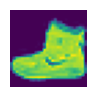

In [91]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(item)

In [92]:
# torchvision.transforms.PILToTensor
""" Convert a PIL Image to a tensor of the same type - this does not scale values. """
transform = torchvision.transforms.PILToTensor()
img = transform(item)
print(type(img), img.size(), img.dtype)

<class 'torch.Tensor'> torch.Size([1, 28, 28]) torch.uint8


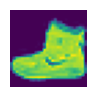

In [93]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(img.squeeze())  # we need to remove first dim '1'.

`PILtoTensor` uses ints [0-255] and doesn't normalize to [0, 1]. Use `ToTensor` instead.

In [94]:
# torchvision.transforms.ToTensor
""" Convert a PIL Image or ndarray to tensor and scale the values accordingly. """
transform = torchvision.transforms.ToTensor()
img = transform(item)
print(type(img), img.size(), img.dtype)

<class 'torch.Tensor'> torch.Size([1, 28, 28]) torch.float32


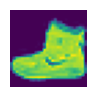

In [95]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(img.squeeze())  # we need to remove first dim '1'.

In [96]:
# We can transform in during the constructor
train_data = torchvision.datasets.FashionMNIST(root=".cache", train=True, download=True, transform=torchvision.transforms.ToTensor())

In [97]:
# torch.utils.data.DataLoader(dataset, batch_size=1, ...)
""" Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset. """
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=4)  
iterator = iter(train_dataloader)    # this iterator will return 4 samples for each increment
imgs, labels = next(iterator)
print(len(imgs), labels)

4 tensor([9, 0, 0, 3])


In [98]:
# We can iterate directly on the data loader
for imgs, labels in train_dataloader:
    # we get 4 images each time
    pass

# If we want the index as well, we can use enumerate
for batch_idx, (imgs, labels) in enumerate(train_dataloader):
    # we get 4 images each time
    pass

In [99]:
""" transformations """
import torchvision.transforms as T

toggle_warnings(False)
resize = T.Resize(256)
new_img = resize(img)
transforms = T.Compose([T.Resize(256),
T.RandomCrop(224),
T.RandomHorizontalFlip(0.5),
T.RandomRotation(30),
T.RandomPerspective(distortion_scale=0.3, p=0.5)])
print(transforms(img))
toggle_warnings(True)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [100]:
import datasets as ds  # Not standard. must be installed.
dataset = ds.load_dataset("glue", "sst2", cache_dir=".cache")
sentence_list = dataset["train"]["sentence"]
labels_list   = dataset["train"]["label"]
print(sentence_list[1],labels_list[1],sep="\n")

Found cached dataset glue (D:/OneDriveEducation/MSc/22961 - Deep Learning/Notes/.cache/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

contains no wit , only labored gags 
0


---

## Activation Functions

In [101]:
from torch import nn   # NN building blocks

In [102]:
# torch.nn.Sigmoid(*args, **kwargs)

nn.Sigmoid()

Sigmoid()

In [103]:
# torch.nn.ReLU(inplace=False)

nn.ReLU()

ReLU()

In [104]:
# torch.argmax(input) → LongTensor
""" Returns the indices of the maximum value of all elements in the input tensor. """
a = torch.randn(3,6)
print(a)
print(f"Max value: {torch.max(a)}, argmax: {torch.argmax(a)}")
print(f"argmax(dim=1): {torch.argmax(a, dim=1)}")   # Iterate columns. Extract max index for each row.

tensor([[ 0.8302, -0.3834, -0.4182, -2.5058,  0.5465,  1.0004],
        [ 0.8964, -0.0165, -1.5595,  0.9180, -0.0855,  0.3434],
        [ 0.7533, -0.4544, -0.1926,  0.3707, -0.4360,  0.3800]])
Max value: 1.000368356704712, argmax: 5
argmax(dim=1): tensor([5, 3, 0])


In [105]:
# torch.nn.Softmax(dim=None)
""" Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1. """
# softmax(x_i) = exp(x_i) / sum_j(torch.exp(x_j), axis)

z = torch.zeros(2,3)   #   ln (1) = np.log(1) = 0;
nprint('z', z)

""" e^0 = 1 """
# dim=0 -> iterating rows: (1/(1+1)) = 0.5
f = nn.Softmax(dim=0)
nprint('dim=0', f(z))

# dim=1 -> iterating columns: (1/(1+1+1)) = 0.333
f = nn.Softmax(dim=1)
nprint('dim=1', f(z))

[*] z:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

[*] dim=0:
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

[*] dim=1:
tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])



In [106]:
# torch.nn.LogSoftmax(dim=None)
""" Applies the log(Softmax(x)) function to an n-dimensional input Tensor. """
z = torch.zeros(2,3)

f = nn.LogSoftmax(dim=0)
nprint('dim=0', f(z))

f = nn.LogSoftmax(dim=1)
nprint('dim=1', f(z))

[*] dim=0:
tensor([[-0.6931, -0.6931, -0.6931],
        [-0.6931, -0.6931, -0.6931]])

[*] dim=1:
tensor([[-1.0986, -1.0986, -1.0986],
        [-1.0986, -1.0986, -1.0986]])



The `LogSoftmax` is good if we receive probabilities that are near 0 with `Softmax`. 

This is because `log(e^x) = x`. We will not receive `log(0) = NaN`.

Another advantage is that we will receive a more accurate result. 

In [107]:
# torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean')
""" The negative log likelihood loss. It is useful to train a classification problem with C classes. """
# Input = LogSoftmax, Output = Cross Entropy
nn.NLLLoss()

NLLLoss()

---

## Neural Network related

In [108]:
# torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
""" Applies a linear transformation to the incoming data: y = xA + b """
z = nn.Linear(2,1)

print(z, z.weight, z.bias, sep='\n\n')

Linear(in_features=2, out_features=1, bias=True)

Parameter containing:
tensor([[ 0.2904, -0.6469]], requires_grad=True)

Parameter containing:
tensor([-0.3481], requires_grad=True)


In [109]:
# Context-manager that disabled gradient calculation. In this mode, the result of every computation will have requires_grad=False.
with torch.no_grad():
    z.weight[0, 0] = 1
    
print(z.weight)

Parameter containing:
tensor([[ 1.0000, -0.6469]], requires_grad=True)


In [110]:
# torch.nn.functional.one_hot(tensor, num_classes=-1) → LongTensor
""" 
Takes LongTensor with index values of shape (*) and returns a tensor of shape (*, num_classes) that have zeros everywhere 
except where the index of last dimension matches the corresponding value of the input tensor, in which case it will be 1.
"""
x = torch.tensor([0, 3, 1, 9])   # each value corresponds to a row
y = torch.nn.functional.one_hot(x, num_classes=10)  # num of classes will determine the columns.
print(y.shape)
print(y)

torch.Size([4, 10])
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


In [111]:
# Model example
""" Defining NLLLoss for LogSoftmax to achieve Cross Entropy """
model = nn.Sequential(
        nn.Linear(784,10), #z
        nn.LogSoftmax(dim=1)) #log(y)
print(model)
CE_loss = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): LogSoftmax(dim=1)
)


In [112]:
# Iterate batch example
def iterate_batch(imgs, labels):
    imgs = imgs.flatten(start_dim=1)
    optimizer.zero_grad()    #  Sets the gradients of all optimized torch.Tensors to zero.
    y_model = model(imgs)
    loss = CE_loss(y_model,labels)   # Cost function
    loss.backward()                  # SGD
    optimizer.step()                 # (W,b) = (W,b) - 0.1 * grad(C)  
    predicted_labels = y_model.argmax(dim=1)
    acc = (predicted_labels == labels).sum()/len(labels)
    return loss.detach(), acc.detach()

In [113]:
# Train example
train_dataloader = DataLoader(train_data, batch_size=256, shuffle=True)
batches = len(train_dataloader)
loss = torch.zeros(batches)
acc = torch.zeros(batches)
for idx, (imgs, labels) in enumerate(train_dataloader):
    loss[idx], acc[idx] = iterate_batch(imgs, labels)

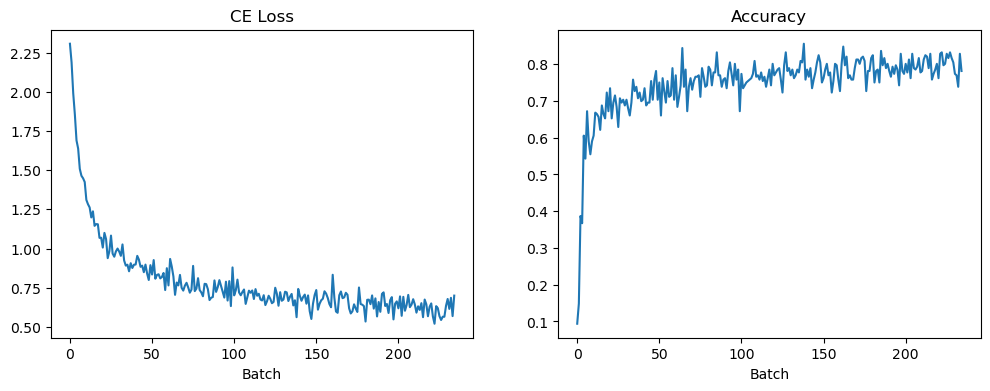

In [114]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot(loss, "CE Loss", "Batch")
plt.subplot(1,2,2)
plot(acc, "Accuracy", "Batch")

We have jumps in accuracy because each minibatch can't represent the entire database!

In [115]:
""" Example for learning rate decay """

num_epochs = 10
num_minibatches = 10
model = nn.Sequential(
    nn.Linear(784,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.LogSoftmax(dim=1)
)
for epoch in range(num_epochs):
    for batch in range(num_minibatches):
        
        # 1st improvement to SGD - learning rate decay
        optimizer = torch.optim.SGD(model.parameters(), lr=1)
        decay = lambda previous_lr: 0.9 ** previous_lr
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=decay)
        ##
        
        optimizer.step()
    scheduler.step()

In [116]:
# 2nd SGD improvement - Momentum
# optimizer = torch.optim.SGD(model, lr=alpha, momentum=beta)

In [117]:
# Adam - useful when dC/wi > dC/wj. Only momentum will not solve this. Maybe different LR for different parameters.
# optimizer = torch.optim.Adam(model, lr=alpha)

In [118]:
# torch.nn.parameter.Parameter(data=None, requires_grad=True)
""" Set a tensor as a model parameter. The optimizer will update it throguh the training process. """
nn.Parameter(torch.ones(5))

Parameter containing:
tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [119]:
# torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
""" 
Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.
This is a cost function for regression models.
"""
nn.MSELoss()  # loss

MSELoss()

In [120]:
# named_parameters(prefix='', recurse=True, remove_duplicate=True)
""" Returns an iterator over module parameters, yielding both the name of the parameter as well as the parameter itself. """
[name for (name, param) in model.named_parameters()]

['0.weight', '0.bias', '2.weight', '2.bias']

In [121]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
""" Applies a 2D convolution over an input signal composed of several input planes. """
# With square kernels and equal stride
print(nn.Conv2d(16, 33, 3, stride=2))
# non-square kernels and unequal stride and with padding
print(nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)))

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))
Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))


In [122]:
# torch.nn.ZeroPad2d(padding)
""" Pads the input tensor boundaries with zero. For N-dimensional padding, use torch.nn.functional.pad(). """
m = nn.ZeroPad2d(2)
t = torch.randn(3, 3)
print(t, m(t), sep='\n\n', end='\n\n')
m = nn.ZeroPad2d((3, 2, 1, 0))  # different padding:  (left, right, top, bottom).
print(m(t))

tensor([[ 0.9146, -0.2032, -0.6589],
        [ 0.8348, -0.6646, -2.2882],
        [-0.1144, -0.2939, -0.7232]])

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.9146, -0.2032, -0.6589,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.8348, -0.6646, -2.2882,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.1144, -0.2939, -0.7232,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.9146, -0.2032, -0.6589,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.8348, -0.6646, -2.2882,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.1144, -0.2939, -0.7232,  0.0000,  0.0000]])


In [123]:
# torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
""" Applies a 2D max pooling over an input signal composed of several input planes. """
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
m(torch.randn(2, 5, 7))

tensor([[[2.0327, 1.0044, 2.1003],
         [2.0327, 1.0235, 1.4664]],

        [[0.6772, 1.2303, 1.9091],
         [1.8069, 2.5603, 1.9091]]])

In [124]:
# torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
""" Applies a 2D average pooling over an input signal composed of several input planes. """
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
print(m(torch.randn(6, 6, 6)))
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
print(m(torch.randn(6, 6, 6)))

tensor([[[-0.1751, -0.3642],
         [-0.0621, -0.2327]],

        [[-0.2808,  0.1786],
         [-0.5190,  0.1391]],

        [[ 0.1053,  0.1537],
         [ 0.1212,  0.0155]],

        [[ 0.7282,  0.1646],
         [ 0.5819, -0.5490]],

        [[ 0.0262, -0.3331],
         [ 0.1137, -0.0099]],

        [[ 0.1302, -0.1156],
         [ 0.0625,  0.2160]]])
tensor([[[ 0.0755, -0.2901, -0.4201, -0.0134,  0.4571],
         [-0.8129, -0.3532,  0.2409,  0.9661,  0.7043]],

        [[-0.0020,  0.8958,  1.1164,  0.8102,  0.5379],
         [-0.1388, -0.0420,  0.1789,  0.2052, -0.0579]],

        [[ 0.2188,  0.2144, -0.1768,  0.1260, -0.3096],
         [-0.2586,  0.0299,  0.1241,  0.3179,  0.1378]],

        [[-1.0359,  0.2892, -0.2523, -0.6369, -0.0319],
         [-0.8868,  0.2385, -0.7736, -1.6848, -0.2517]],

        [[ 0.4171,  0.0626, -0.4953,  0.1476, -0.0347],
         [ 0.2051,  0.3988,  0.0403, -0.1266, -0.2587]],

        [[-0.8064, -0.9271, -0.0756,  0.2580,  0.0669],
         [-0.3

In [125]:
# torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0)
""" this criterion computes the cross entropy loss between input logits and target. """
nn.CrossEntropyLoss()

CrossEntropyLoss()

In [126]:
# Residual Network
import torchvision.models as models
resnet18 = models.resnet18()
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### RNN

In [127]:
import datasets, torchtext

# Load SST-2 dataset
print(f'[*] Loading SST-2 dataset:')
dataset = datasets.load_dataset("glue", "sst2", cache_dir='./.cache')

# Extract sentence and their classification
sentence_list = dataset["train"]["sentence"]
labels_list   = dataset["train"]["label"]      # sentences classification: 0, 1 (negative, positive expressions)
assert len(sentence_list) == len(labels_list)

# Tokenize & create vocabulary
tokenizer = lambda x: x.split()
tokenized = list(map(tokenizer, sentence_list))
vocab     = torchtext.vocab.build_vocab_from_iterator(tokenized, specials=["<UNK>"], min_freq=5)  # delete rare words, treat unknown words.
vocab.set_default_index(0)   # default index for unknown words.

# Tensor conversion
stoi           = lambda x: torch.tensor(vocab(x)) # string to integer
integer_tokens = list(map(lambda x: stoi(x), tokenized))  # convert word strings to integers (tensors).
label_tensors  = list(map(lambda x: torch.tensor(x), labels_list))       # convert labels to tensors.

# Split Train & Test data.
split_index  = len(integer_tokens) * 8//10
train_tokens = integer_tokens[:split_index]
train_labels = label_tensors[:split_index]
test_tokens  = integer_tokens[split_index:]
test_labels  = label_tensors[split_index:]

sentence_list[0],integer_tokens[0], label_tensors[0]

[*] Loading SST-2 dataset:


Found cached dataset glue (D:/OneDriveEducation/MSc/22961 - Deep Learning/Notes/.cache/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

('hide new secretions from the parental units ',
 tensor([ 4575,    93,     0,    36,     1,  7746, 10013]),
 tensor(0))

In [128]:
# torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None, _freeze=False, device=None, dtype=None)
""" A simple lookup table that stores embeddings of a fixed dictionary and size. """
embedding_layer = nn.Embedding(len(vocab), 3)   # 3 embeddings, learnable parameters
integer = stoi(["word"])
print(integer)
print(embedding_layer(integer))

tensor([1234])
tensor([[0.4628, 0.0445, 0.8130]], grad_fn=<EmbeddingBackward0>)


In [129]:
from torchtext.vocab import GloVe
glove_embedder = GloVe(name='6B',dim=50)
embedded = glove_embedder.get_vecs_by_tokens(["It's", "cool"])
print(embedded.size(),embedded.dtype, embedded.requires_grad)

.vector_cache\glove.6B.zip: 862MB [02:44, 5.24MB/s]                                                                    
100%|██████████████████████████████████████████████████████████████████████▉| 399999/400000 [00:18<00:00, 21639.87it/s]


torch.Size([2, 50]) torch.float32 False


In [130]:
# torch.nn.EmbeddingBag(num_embeddings, embedding_dim, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, mode='mean', sparse=False, _weight=None, include_last_offset=False, padding_idx=None, device=None, dtype=None
""" Computes sums or means of ‘bags’ of embeddings, without instantiating the intermediate embeddings. """
weight = torch.FloatTensor([[1, 2.3, 3], [4, 5.1, 6.3]])
embeddingbag = nn.EmbeddingBag.from_pretrained(weight)
embeddingbag(torch.LongTensor([[1, 0]]))  # Get embeddings for index 1

tensor([[2.5000, 3.7000, 4.6500]])